# Show Effect of Scale on Discovery
Measure the number of stable MOFs discovered as a function of node-hours expended

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np

## Load in results from different scales
We have them in the summaries directory, labeled by number of nodes

In [2]:
summaries = []
for path in Path('summaries').glob('*csv.gz'):
    count = int(path.name.split("-")[0])
    summaries.append([count, pd.read_csv(path)])
summaries.sort(key=lambda x: x[0])

## Plot the Efficiency Over Time
Show that we get better at finding MOFs over time

In [3]:
cmap = plt.get_cmap('copper_r')
steps = np.linspace(0.1, 1., len(summaries))

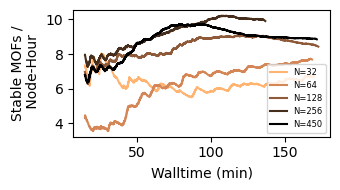

In [4]:
fig, ax = plt.subplots(figsize=(3.5, 2.))

for (count, summary), step in zip(summaries, steps):
    summary = summary.query(f'walltime > {15 * 60}')
    ax.plot(
        summary['walltime'] / 60,
        summary['cumulative_found'] / count / summary['walltime'] * 3600,
        '-',
        color=cmap(step),
        label=f'N={count}'
    )
ax.legend(fontsize=6)

ax.set_xlabel('Walltime (min)')
ax.set_ylabel('Stable MOFs /\n Node-Hour')

fig.tight_layout()
fig.savefig('figures/stable-found-per-node-hour.png', dpi=320)
fig.savefig('figures/stable-found-per-node-hour.pdf')